# PID control on TCLab

This notebook and the associated `pidgui.py` allows you to play with a very basic position form discrete PID using either a modelled version or the real Temperature control lab.

In [1]:
from tclab.gui import NotebookUI
from pidgui import PIDGUI

In [2]:
%matplotlib notebook

In [3]:
interface = NotebookUI(PIDGUI)

In [4]:
interface.controller.gain.max = 1000

We can interact with the interface while it is running. The controller is in the interface. 

**Note that you will have to start the controller and switch to manual to see the effect of these cells:**

In [9]:
controller = interface.controller

In [10]:
controller.pid.eint = 0

In [11]:
controller.setpoint.value = 42

# Advanced usage

Below we set up an experiment which will change the setpoing and increase the gain every 10 minutes.

In [12]:
import tornado

def stepgain():
    if controller.setpoint.value == 45:
        controller.setpoint.value = 40
    else:
        controller.setpoint.value = 45
    controller.gain.value *= 1.1
    if controller.gain.value > 100:
        steptimer.stop()
        interface.action_stop(None)

minute = 60*1000  # a minute in milliseconds
steptimer = tornado.ioloop.PeriodicCallback(stepgain, 10*minute)

steptimer.start()

You can stop the timer by calling `.stop()`

In [14]:
steptimer.stop()

We can analyse the results of the experiments we have made using Pandas:

In [15]:
import pandas

In [16]:
interface.historian.get_sessions()

[(1, '2018-02-17 12:35:44')]

In [17]:
interface.historian.load_session(1)

In [18]:
allresults = pandas.DataFrame.from_records(interface.historian.log, columns=interface.historian.columns, index='Time')

In [19]:
allresults.gain.unique()

array([  1. , 352. ,  37.5])

<IPython.core.display.Javascript object>


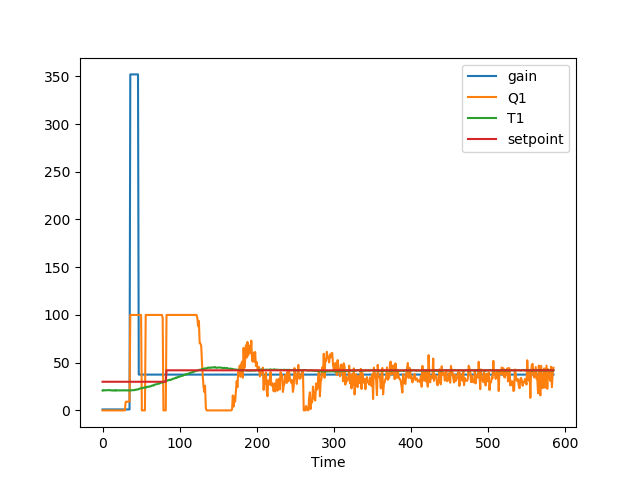

In [20]:
allresults[allresults.index < 15e3][['gain', 'Q1', 'T1', 'setpoint']].plot()